In [1]:
import numpy as np
import pandas as pd
import random
import time
from IPython.display import clear_output

In [2]:
# will use Downing fig 12 for testing on this
class Figure12:
    def __init__ (self, rows, cols, win_state, start_state):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = 20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        
    def sample_action (self):
        rand = random.uniform(0, 1)
        if (rand >= 0) and (rand < 0.25):
            return 0
        elif (rand >= 0.25) and (rand < 0.5):
            return 1
        elif (rand >= 0.5) and (rand < 0.75):
            return 2
        else:
            return 3
        
    def reset (self):
        self.current_state = self.start_state
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            if (next == (2, 0)) or (next == (1, 1)) or (next == (2, 1)) or (next == (1, 3)) or (next == (2, 3)) or (next == (2, 4)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += 0.1
                #reward -= 0.01
            else:
                reward -= 0.01
                #reward -= 1
                #reward = reward
        else:
            reward -= 0.01
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward -= 0.01
            #reward -= 1
            #reward = reward
        
        if self.check_win():
            reward += 100
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((5, 5))
        # add barrier
        current_map[(2, 0)] = 5
        current_map[(1, 1)] = 5
        current_map[(2, 1)] = 5
        current_map[(1, 3)] = 5
        current_map[(2, 3)] = 5
        current_map[(2, 4)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [3]:
# will use Downing fig 13 for testing on this
class Figure13:
    def __init__ (self, rows, cols, win_state, start_state):
        self.memory = []
        self.memory_position = 0
        self.memory_limit = 20
        self.rows = rows
        self.cols = cols
        self.start_state = start_state
        self.win_state = win_state
        self.current_state = self.start_state
        
    def sample_action (self):
        rand = random.uniform(0, 1)
        if (rand >= 0) and (rand < 0.25):
            return 0
        elif (rand >= 0.25) and (rand < 0.5):
            return 1
        elif (rand >= 0.5) and (rand < 0.75):
            return 2
        else:
            return 3
        
    def reset (self):
        self.current_state = self.start_state
        return self.current_state
        
    # just reset for now...
    def close (self):
        self.current_state = self.start_state
        return 1
    
    def check_win (self):
        if self.current_state == self.win_state:
            return True
        return False
    
    def step (self, action):
        # north
        if action == 0:
            next = (self.current_state[0] - 1, self.current_state[1])
        # south
        elif action == 1:
            next = (self.current_state[0] + 1, self.current_state[1])
        # east
        elif action == 2:
            next = (self.current_state[0], self.current_state[1] + 1)
        # west
        else:
            next = (self.current_state[0], self.current_state[1] - 1)

        terminate = False
        reward = 0
        # check if move is legal
        if (next[0] >= 0 and next[0] <= (self.rows-1)) and (next[1] >= 0 and next[1] <= (self.cols-1)):            
            illegal = 0
            if (next == (2, 0)) or (next == (1, 1)) or (next == (2, 1)) or (next == (1, 3)) or (next == (2, 3)) or (next == (3, 3)) or (next == (3, 4)):
                illegal = 1
                    
            if (illegal == 0):
                self.current_state = next
                reward += 0.1
                #reward -= 0.01
            else:
                reward -= 0.01
                #reward -= 1
                #reward = reward
        else:
            reward -= 0.01
            #reward -= 1
            #reward = reward
            
        # punish repeat states within last 20 states
        if self.current_state in self.memory:
            reward -= 0.01
            #reward -= 1
            #reward = reward
        
        if self.check_win():
            print('Winner Winner Chicken Dinner!')
            reward += 100
            terminate = True
        
        # add new state to memory
        if len(self.memory) <= self.memory_limit:
            (self.memory).append(self.current_state)
        # after memory is full, begin overriding it
        else:
            if self.memory_position < self.memory_limit:
                self.memory[self.memory_position] = self.current_state
                self.memory_position += 1
            else:
                self.memory_position = 0
                self.memory[self.memory_position] = self.current_state
        
        return self.current_state, reward, terminate
    
    def animate_path(self, sequence):
        current_map = np.zeros((5, 5))
        # add barrier
        current_map[(2, 0)] = 5
        current_map[(1, 1)] = 5
        current_map[(2, 1)] = 5
        current_map[(1, 3)] = 5
        current_map[(2, 3)] = 5
        current_map[(3, 3)] = 5
        current_map[(3, 4)] = 5
        current_map[self.win_state] = 8

        # animate the run!
        for i in range(len(sequence)):
            time.sleep(0.5)
            if i == 0:
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(0)
                print(current_map)
            else:
                current_map[sequence[i-1]] = 0
                current_map[sequence[i]] = 1
                clear_output(wait=True)
                print(i)
                print(current_map)

In [4]:
def evaluate (team, state, epsilon):
    top_learner = None
    action = None   

    # get best learner
    actVars = {'frameNum':random.randrange(0, 100000000)}

    valid_learners = [lrnr for lrnr in team.learners if lrnr.isActionAtomic()]

    top_learner = max(valid_learners, key=lambda lrnr: lrnr.bid(state, actVars=actVars))

    if top_learner == None:
        print('No top learner found!')
        return None, 0
    else:
        actions = []
        top_q = 0
        top_action = None
        
        for entry in team.q_table:
            if entry['learner'] == str(top_learner.id):
                actions.append(entry['action'])
                if entry['q'] >= top_q: # greater than OR greater than or equal to??
                    top_q = entry['q']
                    top_action = entry['action']            
        
        # e greedy action selection
        e_prob = random.uniform(0, 1)
        
#         if (len(actions) == 0):
#             print('NO ACTIONS!!!!!!')
#             print(team.learners)
#             for entry in team.q_table:
#                 print(entry)
#                 print('-')
#             print('NO ACTIONS!!!!!!')
        if e_prob < epsilon:
            if len(actions) == 1:
                action = actions[0]
            else:
                rand_action = random.randint(0, len(actions)-1)
                action = actions[rand_action]
        else:
            # select action with highest q value from top learner's actions
            action = top_action
    
    return top_learner, action

In [5]:
def update (team, next_learner, action, learner, reward, alpha, discount):
    
    # find the greatest q value out of possible actions for learner t+1
    second_max_q = 0
    for second_learner in team.q_table:
        if second_learner['learner'] == str(next_learner.id):
            if second_learner['q'] > second_max_q:
                second_max_q = second_learner['q']
    
    # find the current learner and q update
    for first_learner in team.q_table:
        if first_learner['learner'] == str(learner.id) and first_learner['action'] == action:
            # equation 1 from tpg pdf
            first_learner['q'] += alpha * (reward + (discount * second_max_q) - first_learner['q'])

In [6]:
def evaluate_fitness (team, env, epsilon, alpha, discount):
    l_t, a_t = evaluate(team, env.current_state, epsilon)
    t = 0
    t_max = 50
    total_reward = 0
    while t < t_max:
        s_next, reward, isDone = env.step(a_t)
        total_reward += reward
        if isDone:
            return total_reward
        
        l_next, a_next = evaluate(team, env.current_state, epsilon)
        if l_t.id != l_next.id:
            update(team, l_next, a_t, l_t, reward, alpha, discount)
        a_t = a_next
        l_t = l_next
        t = t + 1
    return total_reward

In [7]:
# tpg imports
# import to do training
from tpg.trainer import Trainer
# import to run an agent (always needed)
from tpg.agent import Agent
# visual tools
from IPython.display import clear_output
import time
import matplotlib.pyplot as plt
# for writing
import csv
from datetime import date

In [8]:
# q table helper functions
def create (agents, gen):
    for agent in agents:
        team = agent.team
        for learner in team.learners:
            # randomize actions of the learners
            action_list = [1, 2, 3, 4]
            random.shuffle(action_list)
            actions = random.randint(1,4)
            for i in range(actions):
                (team.q_table).append({'learner': str(learner.id), 'action': action_list[i], 'q': 0, 'gen': gen})
#         print('---------------------')
#         print(team.learners)
#         for entry in team.q_table:
#             print(entry)
#             print('-')
#         print('---------------------')

# add new learners upon evolution
def evolve (agents, lemarkian, gen):
    for agent in agents:
        team = agent.team
        for learner in team.learners:   
            
            found = 0
            for entry in team.q_table:
                if entry['learner'] == str(learner.id):
                    found = 1
            
            parent_actions = []
            
            if team.parentTeam:
                # grab the actions from the parent learner
                parent_actions = [entry for entry in (team.parentTeam).q_table if entry['learner'] == str(learner.id) and entry['gen'] == gen-1] 
            
            if parent_actions:
                for entry in parent_actions:
                    (team.q_table).append({'learner':str(learner.id), 'action':entry['action'], 'q':entry['q'], 'gen':gen})
            else:
                (team.q_table).append({'learner':str(learner.id), 'action':learner.actionObj.actionCode, 'q':0, 'gen':gen})
#                 action_list = [1, 2, 3, 4]
#                 random.shuffle(action_list)
#                 actions = random.randint(1,4)
#                 for i in range(actions):
#                     (team.q_table).append({'learner':str(learner.id), 'action': action_list[i], 'q': 0, 'gen': gen})

            # if there were no learners, just sample new ones
            
            
#             # if q_table is empty, thus not yet added
#             if found == 0:         
#                 if (team.parentTeam).q_table:
#                     for entry in (team.parentTeam).q_table:
#                         if entry['learner'] == str(learner.id):
#                             #(team.q_table).append(entry)
#                             (team.q_table).append({'learner':str(learner.id), 'action': entry['action'], 'q': entry['q'], 'gen': gen})
#                 else:
#                     action_list = [1, 2, 3, 4]
#                     random.shuffle(action_list)
#                     actions = random.randint(1,4)
#                     for i in range(actions):
#                         (team.q_table).append({'learner':str(learner.id), 'action': action_list[i], 'q': 0, 'gen': gen})
                        
def clean (agents, current_gen):
    for agent in agents:
        team = agent.team
        for entry in team.q_table:
            if entry['gen'] < (current_gen):
                (team.q_table).remove(entry)

In [9]:
runs = 1
lemarkian = 1
save = 0
for run in range(runs):
    print(run)
    trainer = Trainer(actions=4, teamPopSize=50, pActAtom=1.0, 
                      nRegisters=4, initMaxActProgSize=48, 
                      initMaxTeamSize=2, maxTeamSize=10, gap=0.5) # initMaxTeamSize=2, maxTeamSize=5

    #table = q_table()

    # environment select... should probably improve this someday...
#     envName = 'fig11'
#     env = Figure11(5, 5, (0, 4), (4, 0))
    envName = 'fig12'
    env = Figure12(5, 5, (0, 4), (4, 0))
#     envName = 'fig13'
#     env = Figure13(5, 5, (2, 4), (4, 0))


    allScores = []
    num_gen = 50
    champion = None
    best_score = -10000000


    # parameters
    alpha = 0.1
    epsilon = 0.1
    discount = 0.9

    for gen in range(num_gen):
        print(gen)
        scoreList = []
        #print('gen' + str(gen))
        agents = trainer.getAgents()

        # update q table with new populations
        if gen == 0:
            create(agents, gen)
        else:
            # lemarkian learning set (set to 0 to turn off)
            evolve(agents, lemarkian, gen)
            #clean(agents, gen)

        for agent in agents:
            team = agent.team
            #for team in agent.teams:
            env.reset()
            fitness = evaluate_fitness(team, env, epsilon, alpha, discount)

            # save champion on last gen
            if gen == (num_gen - 1):
                if fitness > best_score:
                    best_score = fitness
                    print('Champ fitness: ' + str(fitness))
                    champion = team
#                 for entry in champion.q_table:
#                     print(entry)
#                     print('--')

            # apply scores
            agent.reward(fitness, envName)
            scoreList.append((agent.team.id, agent.team.outcomes))

        # evolution :)
        teams = trainer.applyScores(scoreList)
        trainer.evolve(tasks=[envName])

        # scores!
        scoreStats = trainer.fitnessStats
        allScores.append((scoreStats['min'], scoreStats['max'], scoreStats['average']))

    # collect average and max scores to save to csv
    if save == 1:
        averages = []
        maxes = []
        for score in allScores:
            averages.append(score[2])
            maxes.append(score[1])    

        df = pd.DataFrame({
            'average_score': averages,
            'max_score': maxes,
        })

        if lemarkian == 0:
            df.to_csv('../results/'+str(envName)+'/qtpg/'+str(run)+'.csv')
        else:
            df.to_csv('../results/'+str(envName)+'/lqtpg/'+str(run)+'.csv')

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
Champ fitness: 102.27
Champ fitness: 102.30999999999999
Champ fitness: 102.5
Champ fitness: 102.86


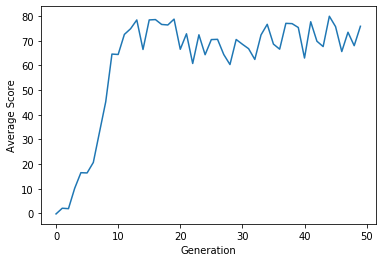

In [10]:
x = []
y = []
for i in range(num_gen):
    x.append(i)

for score in allScores:
    y.append(score[2])
plt.xlabel('Generation')
plt.ylabel('Average Score')
plt.plot(x, y)
plt.show()

## Diagnostics

In [11]:
# find all q values that correspond to given team
def find_team_q (q_table, team):
    result = []  
    for entry in q_table.q:
        if entry['team'] == str(team.id):
            result.append(entry)
    return result

# TODO better organize this for quicker analysis
def display_q (result):
    for entry in result:
        print(entry)

In [12]:
# run a given team after training
def post_training_run (team, epsilon, alpha, discount):
    env.reset()
    l_t, a_t = evaluate(team, env.current_state, epsilon)
    states = []
    print(states)
    states.append(env.current_state)    
    t = 0
    t_max = 50
    total_reward = 0
    while t < t_max:
        s_next, reward, isDone = env.step(a_t)
        states.append(s_next)
        total_reward += reward
        if isDone:
            return states, total_reward
        l_next, a_next = evaluate(team, env.current_state, epsilon)
        print('State: ' + str(s_next) + ' Action: ' + str(a_next))
        if l_t.id != l_next.id:
            print('Switching Learners!')
            print('Learner: ' + str(l_next.id))
            update(team, l_next, a_t, l_t, reward, alpha, epsilon)
        a_t = a_next
        l_t = l_next
        t = t + 1
    return states, total_reward

In [13]:
# run tests on champion
display_q(champion.q_table)
for learner in champion.learners:
    print(learner.id)

{'learner': '05b27a4b-0a05-4dd4-b9c4-ecf5b70ab680', 'action': 0, 'q': 0.5652309625004873, 'gen': 45}
{'learner': '91c40505-ac71-48cc-927b-ff041ef82403', 'action': 2, 'q': 0.5395269819677596, 'gen': 45}
{'learner': '920315ea-5959-411c-9a35-d915d9cfae78', 'action': 2, 'q': 0, 'gen': 45}
{'learner': 'd0fe7072-9aea-42ec-bc34-ca7d8a7ba4ce', 'action': 1, 'q': 0.579132201258599, 'gen': 45}
{'learner': 'cd9ee0d1-a791-4c11-9ce3-415d28445246', 'action': 0, 'q': 0, 'gen': 45}
{'learner': 'cca27e54-bfa9-43f2-aca5-dfa1f5b41f6d', 'action': 0, 'q': 0, 'gen': 45}
{'learner': '35a41005-2fe5-498d-9d4a-c0a2f8df478d', 'action': 1, 'q': 0, 'gen': 45}
{'learner': '4e3ee1a2-0cbc-4b73-bd19-99fdd5ae1f1a', 'action': 3, 'q': 0, 'gen': 45}
{'learner': '759842bf-3370-455b-9328-49fafe0cc12d', 'action': 2, 'q': 0, 'gen': 45}
{'learner': 'c604df1c-a071-4b3f-aba9-4be551c4fad8', 'action': 2, 'q': 0, 'gen': 45}
{'learner': '05b27a4b-0a05-4dd4-b9c4-ecf5b70ab680', 'action': 0, 'q': 0.5652419898914264, 'gen': 46}
{'learner

In [14]:
# uses same epsilon, alpha, and discount values as defined prior
states, score = post_training_run(champion, epsilon, alpha, discount)
print(score)

[]
State: (3, 0) Action: 1
Switching Learners!
Learner: d0fe7072-9aea-42ec-bc34-ca7d8a7ba4ce
State: (4, 0) Action: 0
Switching Learners!
Learner: 05b27a4b-0a05-4dd4-b9c4-ecf5b70ab680
State: (3, 0) Action: 1
Switching Learners!
Learner: d0fe7072-9aea-42ec-bc34-ca7d8a7ba4ce
State: (4, 0) Action: 0
Switching Learners!
Learner: 05b27a4b-0a05-4dd4-b9c4-ecf5b70ab680
State: (3, 0) Action: 2
Switching Learners!
Learner: 91c40505-ac71-48cc-927b-ff041ef82403
State: (3, 1) Action: 0
Switching Learners!
Learner: 05b27a4b-0a05-4dd4-b9c4-ecf5b70ab680
State: (3, 1) Action: 1
Switching Learners!
Learner: d0fe7072-9aea-42ec-bc34-ca7d8a7ba4ce
State: (4, 1) Action: 0
Switching Learners!
Learner: 05b27a4b-0a05-4dd4-b9c4-ecf5b70ab680
State: (3, 1) Action: 2
Switching Learners!
Learner: 91c40505-ac71-48cc-927b-ff041ef82403
State: (3, 2) Action: 0
Switching Learners!
Learner: 05b27a4b-0a05-4dd4-b9c4-ecf5b70ab680
State: (2, 2) Action: 1
Switching Learners!
Learner: d0fe7072-9aea-42ec-bc34-ca7d8a7ba4ce
State: 

In [15]:
env.animate_path(states)

34
[[0. 0. 0. 0. 1.]
 [0. 5. 0. 5. 0.]
 [5. 5. 0. 5. 5.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
